In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [3]:
# Step: Load from ZIP again
zip_path = r"C:\Users\susan\Downloads\archive (2).zip"
extract_folder = "extracted_data"
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    extracted_files = zip_ref.namelist()

# Adjust file name if different inside zip
csv_file_path = os.path.join(extract_folder, "Sample - Superstore.csv")

# Load dataset
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')
df.columns = df.columns.str.strip()  # Clean column names
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


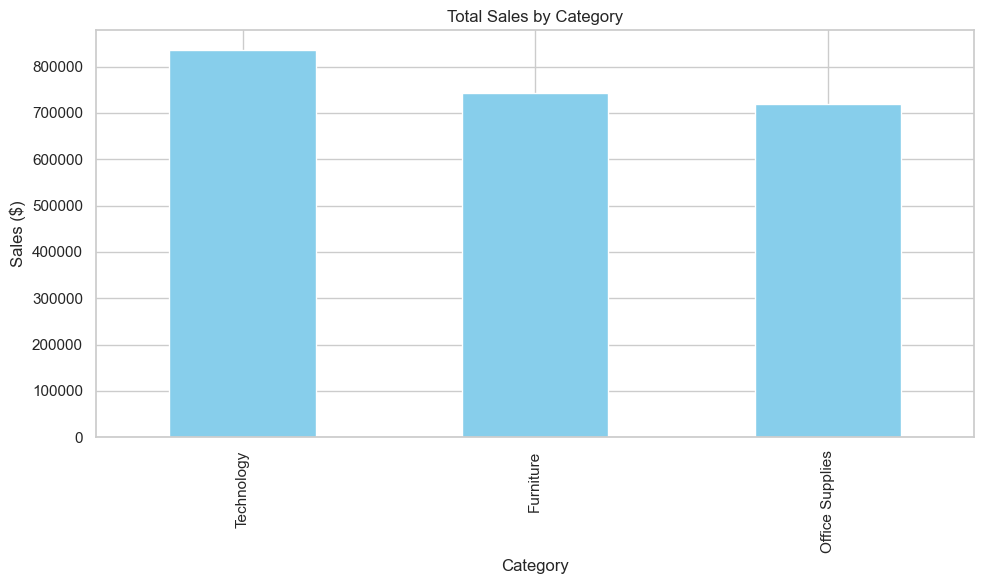

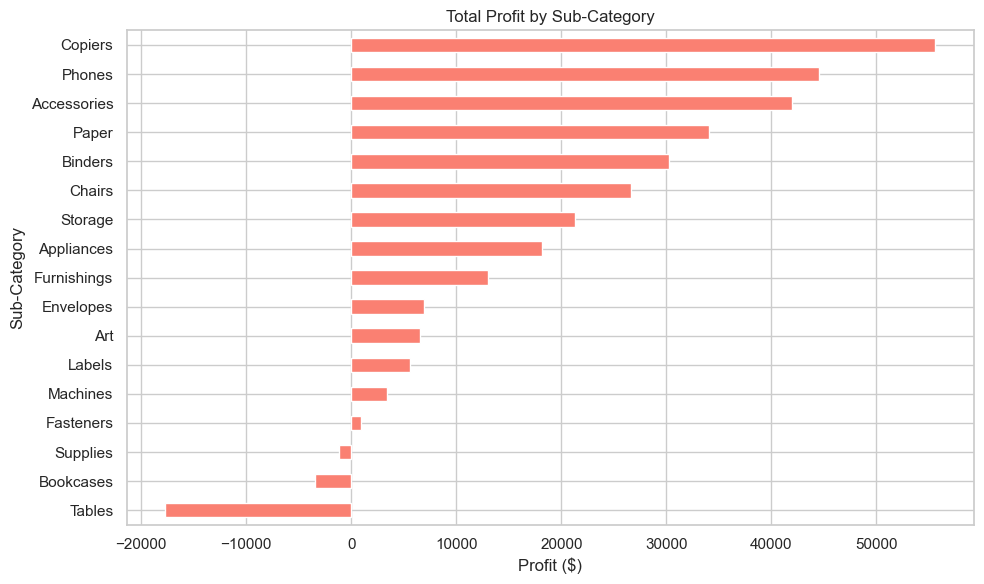

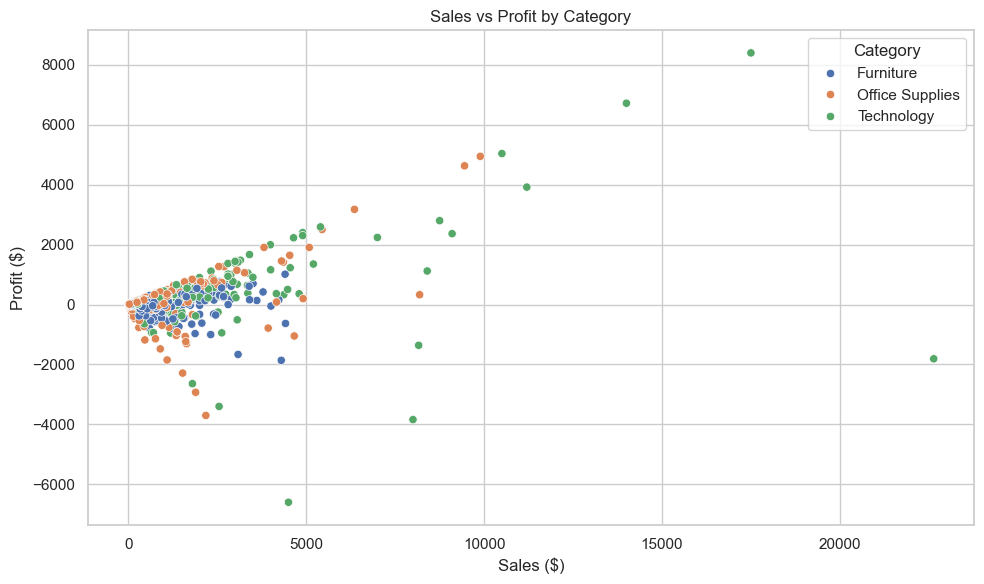

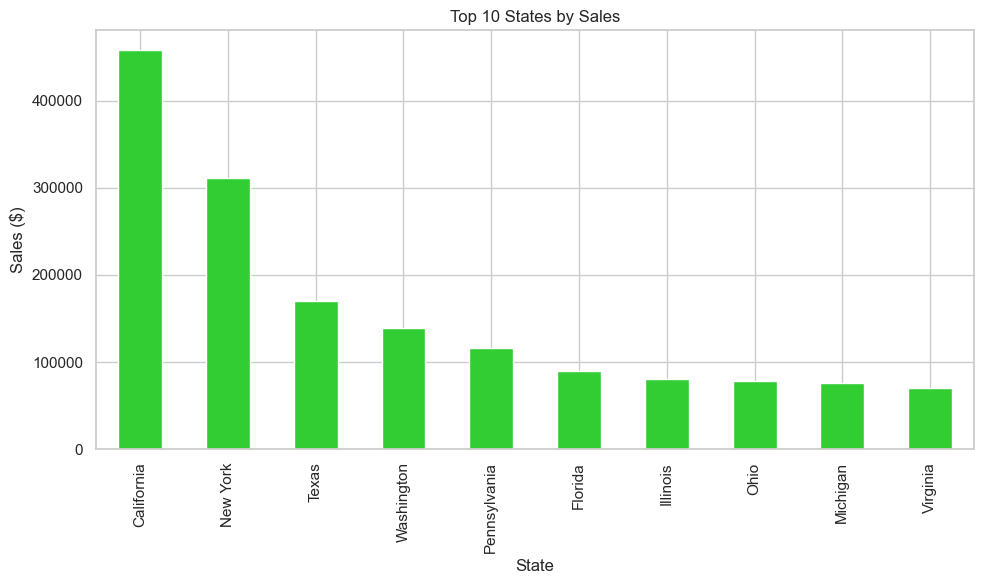

C:\Users\susan\AppData\Local\Temp\ipykernel_4240\386676225.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


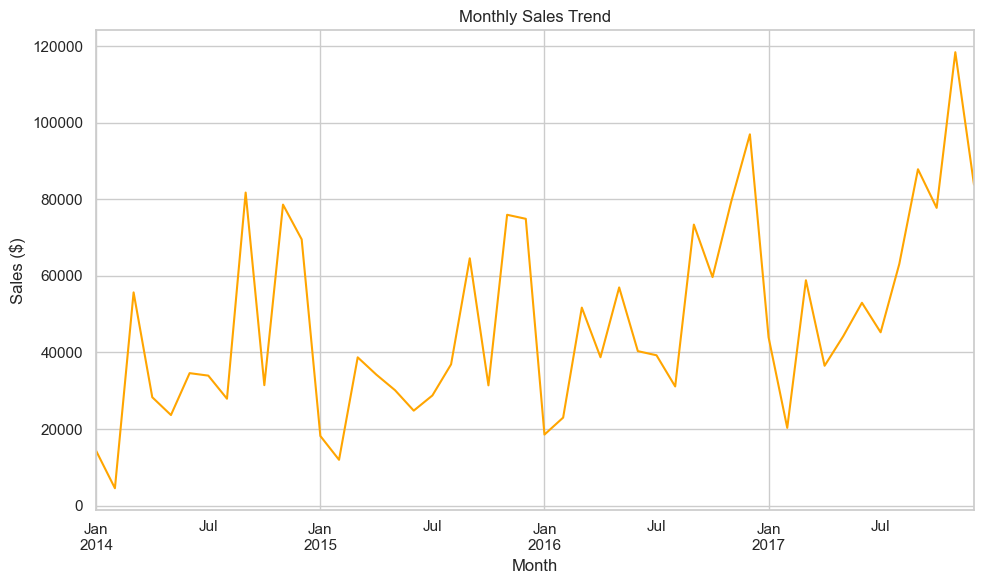

In [4]:
# 1. Total Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

# 2. Total Profit by Sub-Category
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.plot(kind='barh', color='salmon')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Profit ($)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

# 3. Sales vs Profit Scatter Plot
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.tight_layout()
plt.show()

# 4. Top 10 States by Sales
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', color='limegreen')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

# 5. Monthly Sales Trend
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_sales.plot(color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()


### Insight: Sales by Category

The **Technology** category generates the highest sales, followed by **Furniture** and **Office Supplies**. This suggests that investing more in Technology products may result in higher revenue, but we must also consider profitability.


### Insight: Profit by Sub-Category

Some sub-categories like **Copiers** and **Phones** are highly profitable, while others like **Tables** and **Bookcases** result in losses. This indicates the business should reassess pricing, cost, or marketing strategies for underperforming sub-categories.


### Insight: Sales vs Profit

There is no direct linear relationship between sales and profit. Some high-sales transactions result in negative profit, indicating discounts or high costs. This plot helps identify segments that sell well but hurt margins.


### Insight: Top States by Sales

**California** dominates sales, followed by **New York** and **Texas**. These high-performing states can be targeted for new product launches or promotions. We could also analyze why other large states are underperforming.


### Insight: Monthly Sales Trend

Sales show a cyclical pattern with noticeable spikes during **year-end months** (October to December), likely due to holiday season buying. This insight is useful for inventory planning and promotional timing.


# 📊 Summary - Superstore Sales Analysis

In this analysis, we explored key sales and profit trends from the Superstore dataset using Python visualizations. Here's a summary of the key business insights:

---

### ✅ High-Level Insights:
- **Technology** is the top-selling category, suggesting strong demand.
- **Office Supplies** shows stable performance, but lower margins.
- **Furniture** (especially Tables and Bookcases) have negative profit, requiring cost review or strategy change.

---

### 🧠 Sub-Category & Product Strategy:
- **Copiers** and **Phones** yield the highest profit margins — worth prioritizing in promotions.
- **Tables** generate large losses despite moderate sales — possible over-discounting or high shipping costs.

---

### 🌍 Regional Trends:
- **California, New York, and Texas** lead in overall sales.
- These states are ideal for launching new products or region-specific marketing campaigns.

---

### 📆 Seasonal Trends:
- Significant sales peaks occur in **November and December** — likely due to holiday shopping.
- The business can optimize inventory, staffing, and advertising for these high-traffic months.

---

> 🔚 **Conclusion**: These visual insights help the business refine product strategy, optimize pricing, and focus efforts on profitable categories and regions.
